<a href="https://colab.research.google.com/github/Anubhav3084/Deep-Learning/blob/main/PyTorch_Tutorial/Training_Deep_Neural_Networks_on_a_GPU_with_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Training Deep Neural Networks on a GPU with PyTorch**

## **Importing modules and creating libraries**

In [ ]:
import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor
from torchvision.utils import make_grid
from torch.utils.data.dataloader import DataLoader
from torch.utils.data import random_split
%matplotlib inline

In [ ]:
dataset = MNIST(root='data/',
                download=True,
                transform=ToTensor())

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [ ]:
len(dataset)

60000

img.shape: torch.Size([1, 28, 28])
Label: 5


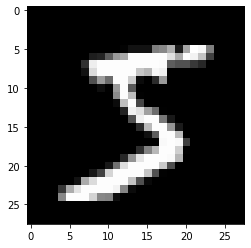

In [ ]:
img, label = dataset[0]
print('img.shape:', img.shape)
plt.imshow(img[0], cmap='gray')
print('Label:',label)

Next, let's use the `random_split` helper function to set aside 10000 images for out validation set

In [ ]:
val_size = 10000
train_size = len(dataset) - val_size

train_ds, val_ds = random_split(dataset, [train_size, val_size])
len(train_ds), len(val_ds)

(50000, 10000)

We now create PyTorch dataloaders for training and validation.

In [ ]:
batch_size = 128

In [ ]:
train_loader = DataLoader(train_ds, batch_size, shuffle=True, num_workers=4, pin_memory=True)
val_loader = DataLoader(val_ds, batch_size, num_workers=4, pin_memory=True)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Let's visualize a batch of data using the `make_grid` function from `torchvision`. We'll also use tge `.permute` methid on the tensor to move the channels to the last dimension, as expected by `matplotlib`.

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


images.shape: torch.Size([128, 1, 28, 28])


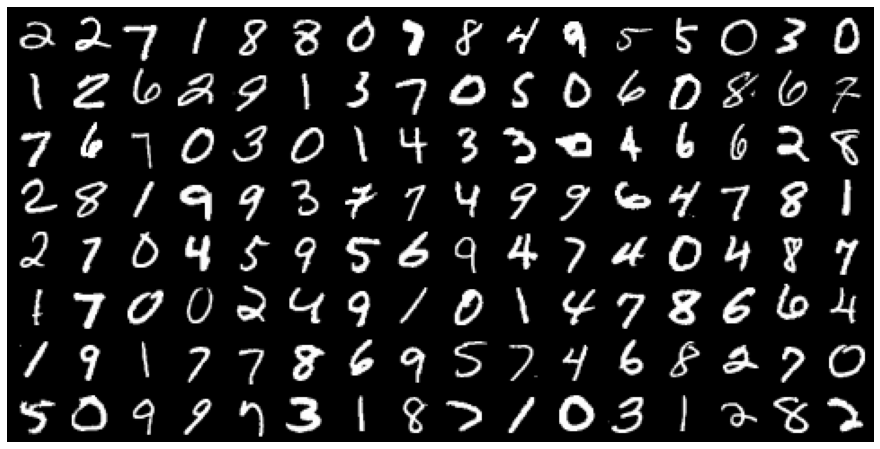

In [ ]:
for images, _ in train_loader:
  print('images.shape:',images.shape)
  plt.figure(figsize=(16,8))
  plt.axis('off')
  plt.imshow(make_grid(images, nrow=16).permute(1,2,0))
  break

## **Hidden Layers, Activation Functions and Non-Linearity**
* We will create a neural network with two layers: a *hidden layer* and an *output layer*.
* We will use an *activation function* between two layers.

We will see how activation functions and multiple layers help capture non-linear relationships between input and output.

In [ ]:
for images, labels in train_loader:
  print('images.shape:', images.shape)
  inputs = images.reshape(-1,784)
  print('inputs.shape:', inputs.shape)
  break

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


images.shape: torch.Size([128, 1, 28, 28])
inputs.shape: torch.Size([128, 784])


Next, let's create a `nn.Linear` object, which will serve as our *hidden layer*. We'll set the size of the output from the hidden layer to 32 (32 neurons in hidden layer). This number can be increased or decreased to change the *learning capacity* of the model.

In [ ]:
input_size = inputs.shape[-1]
print(input_size)
hidden_size = 32

784


In [ ]:
layer1 = nn.Linear(input_size, hidden_size)

We can now compute intermediate outputs for the batches of images by passing `inputs` through `layer1`.

In [ ]:
inputs.shape

torch.Size([128, 784])

In [ ]:
layer1_outputs = layer1(inputs)
print('layer1_outputs.shape:',layer1_outputs.shape)

layer1_outputs.shape: torch.Size([128, 32])


* Let's verify that it does the same thing of matrix multiplication or not.
* It can be verified by using `torch.allclose`

In [ ]:
layer1_outputs_direct = inputs @ layer1.weight.t() + layer1.bias
layer1_outputs_direct.shape

torch.Size([128, 32])

In [ ]:
torch.allclose(layer1_outputs, layer1_outputs_direct, 1e-3)

True

* Thus, `layer1_outputs` and `inputs` have a linear relationshop, i.e., each element of `layer1_outputs` is a weighted sum of elements from `inputs`.
* Here limitation is that we can only capture linear relationships between `inputs` and `outputs`.
* We will use **Rectified Linear Unit (ReLU)** function as the **activation function**
\begin{equation}ReLU(x) = max(0,x)\end{equation}
* It simply replaces the negative values with 0

Let's apply the activation function to `layer_outputs` and verify that negative values were replaed with 0

In [ ]:
relu_outputs = F.relu(layer1_outputs)
print('relu_outputs.shape:',relu_outputs.shape)
print('min(layer1_outputs):',torch.min(layer1_outputs).item())
print('min(relu_outputs):',torch.min(relu_outputs).item())

relu_outputs.shape: torch.Size([128, 32])
min(layer1_outputs): -0.622344434261322
min(relu_outputs): 0.0


Here certain outputs are activated (positive) and some are turned off (negative). Hence we call them as activation functions

In [ ]:
output_size = 10
layer2 = nn.Linear(hidden_size, output_size)

In [ ]:
layer2_outputs = layer2(relu_outputs)
layer2_outputs.shape

torch.Size([128, 10])

As expected, `layer2_outputs` contains a batch of vectors of size 10. We can now use this output to compute loss using `F.cross_entropy` and adjust the weights of `layer` and `layer2` using gradient descent.

In [ ]:
loss = F.cross_entropy(layer2_outputs, labels)
loss

tensor(2.3271, grad_fn=<NllLossBackward0>)

Now we can capture non-linear relationships, hence we gave more power to our model.

## **Model**
Let's define the model by extending the `nn.Module` class from PyTorch

In [ ]:
class MnistModel(nn.Module):

  # Feedforward neural network with 1 hidden layer
  def __init__(self, in_size, hidden_size, out_size):
    super().__init__()
    # hidden layer
    self.linear1 = nn.Linear(in_size, hidden_size)
    # output layer
    self.linear2 = nn.Linear(hidden_size, out_size)

  def forward(self, xb):
    # flatten the image tensor
    xb = xb.view(xb.size(0),-1)
    out = self.linear1(xb)
    out = F.relu(out)
    out = self.linear2(out)
    return out

  def training_step(self, batch):

    """return the loss for a batch of data"""
    images, labels = batch
    """nn.Module has a builtin feature that if we invoke a self then it automatically invokes forward method"""
    out = self(images)                  # generate predictions
    loss = F.cross_entropy(out, labels) # calculate loss
    return loss

  def validation_step(self, batch):
    images, labels = batch
    out = self(images)                  # generate predictions
    loss = F.cross_entropy(out, labels) # calculate loss
    acc = accuracy(out, labels)         # calculate accuracy
    return {'val_loss':loss, 'val_acc':acc}

  def validation_epoch_end(self, outputs):
    batch_losses = [x['val_loss'] for x in outputs]
    epoch_loss = torch.stack(batch_losses).mean()   # combine losses
    batch_accs = [x['val_acc'] for x in outputs]
    epoch_acc = torch.stack(batch_accs).mean()      # combine accuracies
    return {'val_loss':epoch_loss.item(), 'val_acc':epoch_acc.item()}

  def epoch_end(self, epoch, result):
    print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))

We also need to define an `accuracy` function which calculates the accuracy of the model's prediction on a batch of inputs. It's used in `validation_step` above.

In [ ]:
def accuracy(outputs, labels):
  _, preds = torch.max(outputs, dim=1)
  return torch.tensor(torch.sum(preds == labels).item() / len(preds))

We'll create a model that contains a hidden layer with 32 activations.

In [ ]:
model = MnistModel(in_size=784, hidden_size=32, out_size=10)

Let's look at the model's parameters. We expect to see one weight and bias matrix for each of the layers.

In [ ]:
for t in model.parameters():
  print(t.shape)

torch.Size([32, 784])
torch.Size([32])
torch.Size([10, 32])
torch.Size([10])


Let's try and generate some outputs usinf our model.

In [ ]:
for images, labels in train_loader:
  outputs = model(images)
  loss = F.cross_entropy(outputs, labels)
  print('Loss:', loss.item())
  break

print('outputs.shape: ', outputs.shape)
print('Sample outputs: ', outputs[:2].data)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Loss: 2.295654058456421
outputs.shape:  torch.Size([128, 10])
Sample outputs:  tensor([[-0.0477,  0.0234, -0.1183, -0.1035,  0.1912, -0.0506,  0.0888, -0.0614,
         -0.0160,  0.1149],
        [-0.0100,  0.0105, -0.1032, -0.0248,  0.1760, -0.0861,  0.1417, -0.0133,
         -0.0381,  0.1970]])


## **Using a GPU**
We can check is a GPU is available and the required NVIDIA CUDA drivers are installed using `torch.cuda.is_available()`

In [ ]:
torch.cuda.is_available()

True

Let's define a helper function to ensure that our code uses the GPU if available and defaults to using the CPU if it's isn't.

In [ ]:
def get_default_device():
  """Pick GPU if available, else CPU"""
  if torch.cuda.is_available():
    return torch.device('cuda')
  else:
    return torch.device('cpu')

In [ ]:
device = get_default_device()
device

device(type='cuda')

Next, let's define a function that can move data and model to a chosen device.

In [ ]:
def to_device(data, device):
  """Move tensor(s) to chosen device"""
  if isinstance(data, (list, tuple)):
    return [to_device(x, device) for x in data]
  return data.to(device, non_blocking=True)     # for tensor or model

In [ ]:
for images, labels in train_loader:
  print(images.shape)
  print(images.device)
  images = to_device(images, device)
  print(images.device)
  break

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


torch.Size([128, 1, 28, 28])
cpu
cuda:0


Finally, we define a `DeviceDataLoader` class to wrap our existing data loaders and move batches of data to the selected device. Interestingly, we don't need to extend an existing class to create a PyTorch data loader.

All we need is an `__iter__` method to retrive batches of existing data and an `__len__` method to get the number of batches.

In [ ]:
class DeviceDataLoader():
  """Wrap a dataloader to move data to a device"""

  def __init__(self, dl, device):
    self.dl = dl
    self.device = device

  def __iter__(self):
    """Yield a batch of data after moving it to device"""
    for b in self.dl:
      yield to_device(b, self.device)

  def __len__(self):
    """Number of batches"""
    return len(self.dl)

The `yield` keyword is used to create a generator function that can be used within a `for` loop, as illustrated below.

In [ ]:
def some_numbers():
  yield 10
  yield 20
  yield 30

for value in some_numbers():
  print(value)

10
20
30


We can now wrap our data loaders using `DeviceDataLoader`.

In [ ]:
train_loader = DeviceDataLoader(train_loader, device)
val_loader = DeviceDataLoader(val_loader, device)

Tensors moved to the  GPU have a `device` property which includes that word `cuda`. Let's verify this by looking at a batch of data from `valid_dl`.

In [ ]:
for xb, yb in val_loader:
  print('xb.device:', xb.device)
  print('yb:', yb)
  break

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


xb.device: cuda:0
yb: tensor([2, 2, 2, 3, 4, 4, 2, 1, 9, 0, 2, 0, 3, 5, 6, 9, 4, 5, 4, 9, 3, 5, 6, 6,
        9, 7, 8, 9, 4, 2, 8, 2, 7, 4, 3, 2, 9, 3, 0, 7, 5, 9, 4, 8, 4, 3, 0, 9,
        2, 7, 7, 4, 6, 2, 5, 3, 8, 0, 0, 0, 4, 7, 4, 1, 4, 1, 3, 1, 5, 7, 3, 1,
        1, 2, 7, 2, 8, 9, 1, 7, 5, 7, 0, 7, 7, 2, 9, 4, 6, 1, 1, 1, 1, 2, 7, 2,
        3, 2, 1, 7, 9, 0, 4, 7, 8, 4, 6, 2, 4, 1, 0, 8, 1, 6, 8, 0, 0, 9, 3, 5,
        1, 7, 5, 3, 2, 3, 9, 2], device='cuda:0')


## **Training a model**
We'll define two functions: `fit` and `evaluate` to train the model using gradient descent and evaluate its performance on the validation set.

In [ ]:
def evaluate(model, val_loader):
  """Evaluate the model's performance on the validation set"""
  outputs = [model.validation_step(batch) for batch in val_loader]
  return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
  """Train the model using gradient descent"""
  history = []
  optimizer = opt_func(model.parameters(), lr)
  for epoch in range(epochs):
    # training phase
    for batch in train_loader:
      loss = model.training_step(batch)
      loss.backward()
      optimizer.step()
      optimizer.zero_grad()
    
    # validation phase
    results = evaluate(model, val_loader)
    model.epoch_end(epoch, results)
    history.append(results)
  return history

Before we train we need to ensure that the data and the model's parameters (weights and biases) are on the same device (CPU or GPU). We can reuse the `to_device` function to move the model's parameters to the right device.

In [ ]:
# Model (on GPU)
model = MnistModel(in_size=784, hidden_size=32, out_size=10)
to_device(model, device)

MnistModel(
  (linear1): Linear(in_features=784, out_features=32, bias=True)
  (linear2): Linear(in_features=32, out_features=10, bias=True)
)

Let's see how the model performs on the validation set with initial sets of weights and biases.

In [ ]:
history = [evaluate(model, val_loader)]
history

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


[{'val_acc': 0.1116495281457901, 'val_loss': 2.317915678024292}]

In [ ]:
history += fit(5, 0.5, model, train_loader, val_loader)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch [0], val_loss: 0.2874, val_acc: 0.9114
Epoch [1], val_loss: 0.1656, val_acc: 0.9488
Epoch [2], val_loss: 0.1471, val_acc: 0.9561
Epoch [3], val_loss: 0.1435, val_acc: 0.9551
Epoch [4], val_loss: 0.1178, val_acc: 0.9604


In [ ]:
history += fit(5, 0.5, model, train_loader, val_loader)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch [0], val_loss: 0.1559, val_acc: 0.9489
Epoch [1], val_loss: 0.1303, val_acc: 0.9586
Epoch [2], val_loss: 0.1146, val_acc: 0.9638
Epoch [3], val_loss: 0.1165, val_acc: 0.9630
Epoch [4], val_loss: 0.1619, val_acc: 0.9475


We can now plot the losses & accuracies to study how the model improves over time.

Text(0.5, 1.0, 'Loss vs No of epochs')

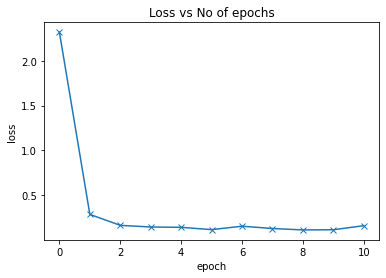

In [ ]:
losses = [x['val_loss'] for x in history]
plt.plot(losses, '-x')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Loss vs No of epochs')

Text(0.5, 1.0, 'Accuracy vs No of epochs')

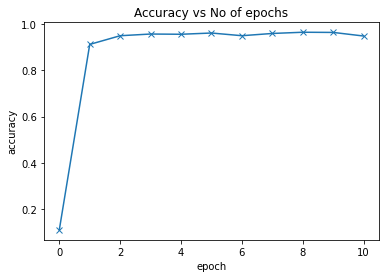

In [ ]:
accuracies = [x['val_acc'] for x in history]
plt.plot(accuracies, '-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs No of epochs')

## **Testing with individual images**

In [ ]:
test_dataset = MNIST(root='data/',
                     train=False,
                     transform=ToTensor())

Let's define a helper function `predict_image`, which returns the predicted label for a single image tensor.

In [ ]:
def predict_image(img, model):
  xb = to_device(img.unsqueeze(0), device)
  yb = model(xb)
  _, preds = torch.max(yb, dim=1)
  return preds[0].item()

Label: 7 , Predicted: 7


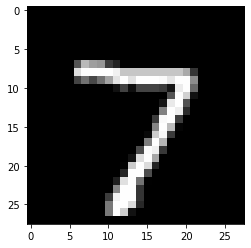

In [ ]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print('Label:',label, ', Predicted:', predict_image(img, model))

Label: 2 , Predicted: 2


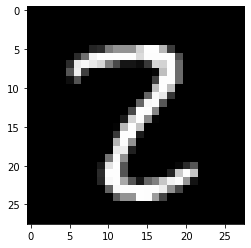

In [ ]:
img, label = test_dataset[1839]
plt.imshow(img[0], cmap='gray')
print('Label:',label, ', Predicted:', predict_image(img, model))

Label: 9 , Predicted: 9


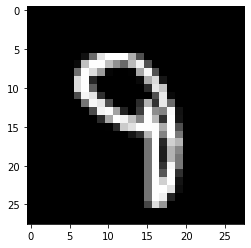

In [ ]:
img, label = test_dataset[193]
plt.imshow(img[0], cmap='gray')
print('Label:',label, ', Predicted:', predict_image(img, model))

As a final step, let's also look at the overall loss and accuracy of the model on the test set.

In [ ]:
test_loader = DeviceDataLoader(DataLoader(test_dataset, batch_size=256), device)
result = evaluate(model, test_loader)
result

{'val_acc': 0.9532226324081421, 'val_loss': 0.1597553938627243}

In [ ]:
torch.save(model.state_dict(), 'mnist-feedforward.pth')